In [1]:
from music21 import *
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import statistics as stats

In [2]:
#Randomly generate list of 100 songs
COMPOSERS_LIST = ["bach", "mozart", "beethoven", "haydn", "schubert", "handel", "Liszt"]

In [15]:
localCorpus = corpus.corpora.LocalCorpus()
localCorpus.addPath('~/MusicAnalysis/Chopin')
localCorpus.addPath('~/MusicAnalysis/Beethoven')
localCorpus.addPath('~/MusicAnalysis/Haydn')
localCorpus.addPath('~/MusicAnalysis/Liszt')
localCorpus.addPath('~/MusicAnalysis/Mozart')
localCorpus.addPath('~/MusicAnalysis/Schubert')
corpus.cacheMetadata()

c:\Users\binkm\MusicAnalysis\venv\lib\site-packages\music21\corpus\corpora.py: WARNING: local metadata cache: starting processing of paths: 109
c:\Users\binkm\MusicAnalysis\venv\lib\site-packages\music21\corpus\corpora.py: WARNING: cache: filename: C:\Users\binkm\AppData\Local\Temp\music21\local.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1622132786.927594
bundles.py: WARNING: Skipped 0 sources already in cache.
bundles.py: WARNING: updated 1 of 109 files; total errors: 0 ... last file: C:\Users\binkm\MusicAnalysis\Beethoven\Beethoven_Minuet_in_G_major_WoO_10_No._2.mxl
bundles.py: WARNING: updated 2 of 109 files; total errors: 0 ... last file: C:\Users\binkm\MusicAnalysis\Beethoven\Fr_Elise.mxl
bundles.py: WARNING: updated 3 of 109 files; total errors: 0 ... last file: C:\Users\binkm\MusicAnalysis\Beethoven\Opus_27_No_2_Moonlight_Sonata_1st_movement.mxl
bundles.py: WARNING: updated 4 of 109 files; total errors: 0 ... last file: C:\Users\binkm\MusicAnalysis\Beethoven\Son

In [17]:
#Get Song List
songList = []
for composer in COMPOSERS_LIST:
    songList.extend(corpus.search(composer, 'composer'))
for composer in COMPOSERS_LIST:
    songList.extend(localCorpus.search(composer, 'composer'))


In [19]:
#Get Notes From Songs

#Two variables to store
middleNotes = 0
outerNotes = 0

noteList = []

for song in songList:
    songNotes = song.parse().flat.getElementsByClass(note.Note)
    print(song)
    for singleNote in songNotes:
        noteList.append(singleNote)

s.MetadataEntry 'bach_bwv407_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv408_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv409_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv41_6_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv410_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv411_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv412_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv413_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv414_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv415_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv416_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv417_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv418_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv419_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv42_7_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv420_mxl'>
<music21.metadata.bundles.MetadataEntry 'bach_bwv421_mxl'>
<music21.metadata.b

In [21]:
#SRS of size 20000
octaves = []
for x in range(1,20000):
    randInd = random.randint(1,len(noteList))
    noteOct = noteList.pop(randInd).octave
    octaves.append(noteOct)
    if noteOct == 4 or noteOct == 5:
        middleNotes += 1
    else:
        outerNotes += 1


In [22]:
#Statistical Analysis
totalNotes = middleNotes + outerNotes
alpha = 0.05
zStar = 1.96

pHat = middleNotes / totalNotes
stdError = math.sqrt(pHat*(1-pHat)/totalNotes)

lowerBound = pHat - zStar*stdError
upperBound = pHat + zStar*stdError

confidenceInterval = (lowerBound, upperBound)
print(confidenceInterval)

zScore = (pHat - 0.5) / stdError
print(zScore)
print(pHat)


(0.583313202911846, 0.5969458100388016)
25.916368167367914
0.5901295064753238


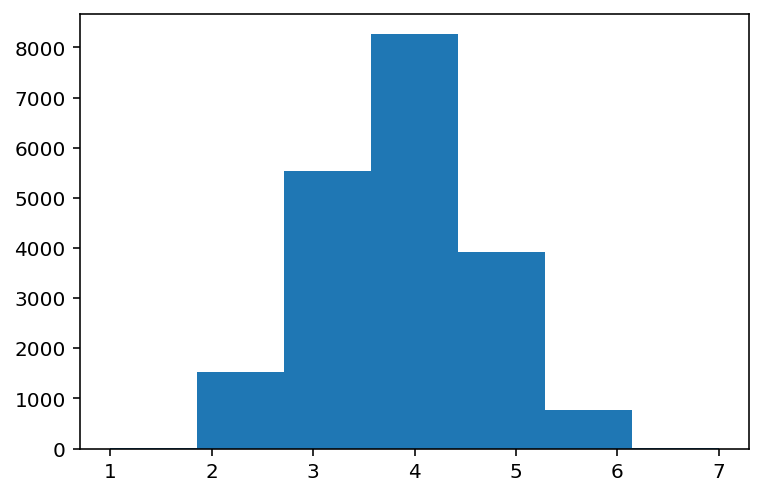

In [12]:
#Basic Histogram of the Notes Distribution
n, bins, data = plt.hist(octaves, 7)

In [24]:
stats.mean(octaves)
sd = stats.stdev(octaves)
sd = sd*sd
print(sd)
print(stats.variance(octaves))

0.9076781971911877
0.9076781971911877


In [7]:
corpus.getLocalPaths()

[WindowsPath('C:/Users/binkm/MusicAnalysis/Beethoven/Beethoven_Minuet_in_G_major_WoO_10_No._2.mxl'),
 WindowsPath('C:/Users/binkm/MusicAnalysis/Beethoven/Beethoven_Sonata_No._23__Op._57_Appassionata_Complete.mscz.mxl'),
 WindowsPath('C:/Users/binkm/MusicAnalysis/Beethoven/Beethoven_Sonata_Op._31_No._17_3rd_Movement_Tempest.mxl'),
 WindowsPath('C:/Users/binkm/MusicAnalysis/Beethoven/Beethoven_Symphony_No._5_1st_movement_Piano_solo.mxl'),
 WindowsPath('C:/Users/binkm/MusicAnalysis/Beethoven/Beethoven_Symphony_No._6_Pastoral_1st_movement_Piano_solo.mxl'),
 WindowsPath('C:/Users/binkm/MusicAnalysis/Beethoven/Beethoven_Symphony_No._7_2nd_movement_Piano_solo.mxl'),
 WindowsPath('C:/Users/binkm/MusicAnalysis/Beethoven/Beethoven_Symphony_No._9_4th_movement_part__An_die_Freude__Ode_to_Joy__for_piano_solo.mxl'),
 WindowsPath('C:/Users/binkm/MusicAnalysis/Beethoven/Egmont_Op._84_Overture__Ludwig_van_Beethoven.mxl'),
 WindowsPath('C:/Users/binkm/MusicAnalysis/Beethoven/Fr_Elise.mxl'),
 WindowsPath